In [1]:
# Load Kepler dataset saved as npy

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
kepid_array = np.load("../data/tfr_shallue/npy_shallue/kepid.npy")
print('kepid_load = ',kepid_array[0])

av_training_set_array = np.load("../data/tfr_shallue/npy_shallue/av_training_set.npy")
print('av_training_set_array = ',av_training_set_array[0])

global_view_array = np.load("../data/tfr_shallue/npy_shallue/global_view.npy")
print('global_view_array = ',global_view_array[0])

local_view_array = np.load("../data/tfr_shallue/npy_shallue/local_view.npy")
print('local_view_array = ',local_view_array[0])


kepid_load =  11709124.0
av_training_set_array =  b'P'
global_view_array =  [ 0.02302243 -0.07644628  0.01446281 ...  0.01239669 -0.17975207
  0.01977568]
local_view_array =  [-6.92397356e-02 -2.56392676e-02 -4.75080535e-02 -6.34126291e-02
 -2.86556520e-02 -7.22561181e-02 -7.22561181e-02  1.56303551e-02
  3.60595062e-02  5.99163622e-02  5.51175699e-02 -4.38746847e-02
  6.16987748e-03  4.48344424e-02  2.11146921e-02  1.93322822e-02
  4.11325163e-04 -4.53828759e-02 -5.10728732e-02 -5.02502210e-02
 -3.57852876e-02 -9.18626133e-03  3.29060107e-02  5.47062457e-02
 -7.54096126e-03  1.37108378e-04  2.26228833e-02  2.57763769e-02
  1.12977311e-01  9.85809267e-02  7.41756335e-02  3.29060107e-02
 -7.87687674e-02  2.42681839e-02  1.53561393e-02  8.08939431e-03
 -1.70014389e-02 -8.80235806e-02 -7.41756335e-02 -7.97970816e-02
 -5.81339560e-02 -2.64619179e-02 -3.08493860e-02  2.33084261e-02
 -3.53739634e-02 -3.53739634e-02  1.37108390e-03  1.09686712e-02
 -1.68643314e-02  1.72756556e-02  1.87838487e

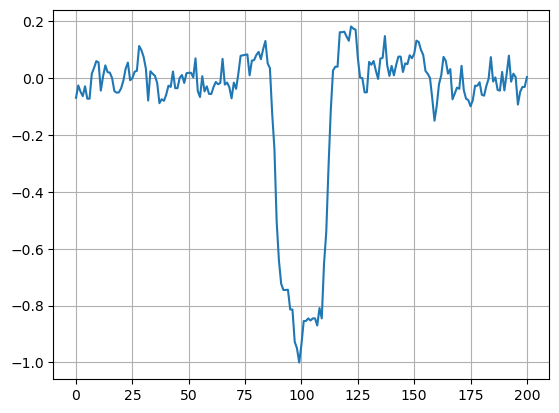

In [5]:
# Plot one light curve (local)
plt.grid('on')
plt.plot(np.arange(len(local_view_array[0])),local_view_array[0])
plt.show()

In [6]:
# Calculate SNR for each Local view lc and save them in an array
local_view_array = local_view_array + 1
noise_array = np.zeros((len(local_view_array),120))
for i in np.arange(len(local_view_array)):
    noise_array[i][0:60] = local_view_array[i,0:60]
    noise_array[i][60:120] = local_view_array[i,141:202]
std_devs_Kepler = np.array([np.std(arr) for arr in noise_array])
SNR_Kepler = 1/std_devs_Kepler

In [7]:
# Code to show the properties of the light curves in Kepler Dataset
print(f"Total no. of light curves in Kepler Dataset = ",len(SNR_Kepler))
print("\tTotal No. of planets = ",len(np.where(av_training_set_array==b'P')[0]))
print("\tTotal no. of non-transiting phenomenon = ",len(np.where(av_training_set_array==b'N')[0]))
print("\tTotal no. of astrophysical false positive = ",len(np.where(av_training_set_array==b'A')[0]))
print("\n---\n")
SNR_Threshold_array = [50,75,100,500]
for SNR_Threshold in SNR_Threshold_array:
    selected_kepler_index_mask = SNR_Kepler > SNR_Threshold
    selected_kepler_index = np.where(selected_kepler_index_mask)[0]
    print(f"For SNR >  {SNR_Threshold}")
    print(f"\tNo. of light curves = ",len(selected_kepler_index))
    # print("Index where label = Planet: ",np.where(lc_label_array[selected_kepler_index]==b'P')[0])
    print("\tNo. of planets = ",len(np.where(av_training_set_array[selected_kepler_index]==b'P')[0]))
    print("\tNo. of non-transiting phenomenon = ",len(np.where(av_training_set_array[selected_kepler_index]==b'N')[0]))
    print("\tNo. of astrophysical false positive = ",len(np.where(av_training_set_array[selected_kepler_index]==b'A')[0]))

    # print('selected_kepler_index_mask = ',selected_kepler_index_mask)
    # print('selected_kepler_index = ',selected_kepler_index)
    

Total no. of light curves in Kepler Dataset =  15737
	Total No. of planets =  3600
	Total no. of non-transiting phenomenon =  2541
	Total no. of astrophysical false positive =  9596

---

For SNR >  50
	No. of light curves =  1952
	No. of planets =  364
	No. of non-transiting phenomenon =  21
	No. of astrophysical false positive =  1567
For SNR >  75
	No. of light curves =  1681
	No. of planets =  256
	No. of non-transiting phenomenon =  17
	No. of astrophysical false positive =  1408
For SNR >  100
	No. of light curves =  1530
	No. of planets =  206
	No. of non-transiting phenomenon =  16
	No. of astrophysical false positive =  1308
For SNR >  500
	No. of light curves =  912
	No. of planets =  41
	No. of non-transiting phenomenon =  14
	No. of astrophysical false positive =  857


No. of light curves with SNR > 500 =  912
Total no. of light curves =  15737


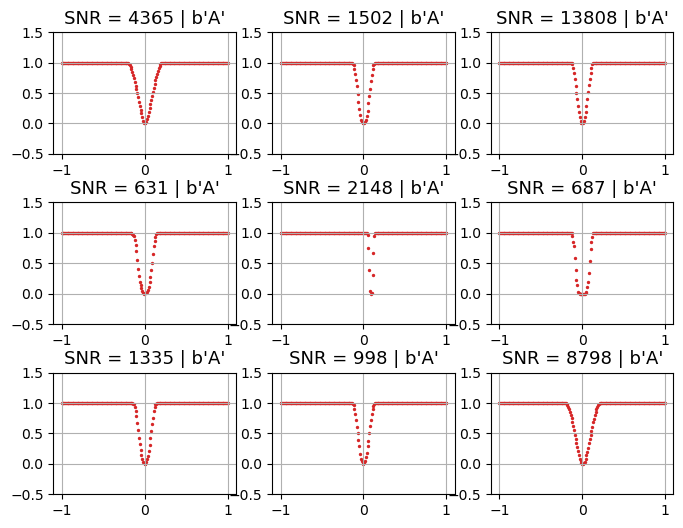

In [13]:
# Save the index of the light curve with SNR > 500
# and plot them
# select_kepler_lc = lc_np_array[SNR_Kepler>75]
# select_kepler_lc = select_kepler_lc + 1

SNR_Threshold = 500
selected_kepler_index_mask = (SNR_Kepler > SNR_Threshold)  # & (SNR_Kepler < 500) 
selected_kepler_index = np.where(selected_kepler_index_mask)[0]
print(f"No. of light curves with SNR > {SNR_Threshold} = ",len(selected_kepler_index))
print(f"Total no. of light curves = ",len(SNR_Kepler))
# Plot the selected light curves 3 x 3
num = 3
fig,ax=plt.subplots(num,3, figsize=(8,6), gridspec_kw={ 'width_ratios': [1,1,1],
        'wspace': 0.2,'hspace': 0.4})

# ax[0][1].set_title('Shape',size=15)
# ax[0][0].set_title('Light Curve (Train Dataset)',size=15)
# ax[num-1][0].set_xlabel('Phase',size=13)
ph_kepler = np.linspace(-1,1,len(local_view_array[0]))


i = 0
for i in np.arange(0,num):
    # k = np.random.randint(0, len(select_kepler_lc)-50)
    k = int(np.random.choice(selected_kepler_index))
    ax[i][0].set_title(f'SNR = {int(np.round(SNR_Kepler[k],0))} | {av_training_set_array[k]}',size=13)
    ax[i][0].set_ylim(-0.5,1.5)
    ax[i][0].scatter(ph_kepler, local_view_array[k],color = 'tab:red',s=2)
    ax[i][0].grid('on')

    k = int(np.random.choice(selected_kepler_index))
    ax[i][1].set_title(f'SNR = {int(np.round(SNR_Kepler[k],0))} | {av_training_set_array[k]}',size=13)
    ax[i][1].set_ylim(-0.5,1.5)
    ax[i][1].scatter(ph_kepler, local_view_array[k],color = 'tab:red',s=2)
    ax[i][1].grid('on')

    k = int(np.random.choice(selected_kepler_index))
    ax[i][2].set_title(f'SNR = {int(np.round(SNR_Kepler[k],0))} | {av_training_set_array[k]}',size=13)
    ax[i][2].set_ylim(-0.5,1.5)
    ax[i][2].scatter(ph_kepler, local_view_array[k],color = 'tab:red',s=2)
    ax[i][2].grid('on')
    i = i + 1

In [ ]:
## Code to shift the light curve to the centre

# Check whether any index for phase axis phase is 0
print('np.where(ph_kepler == 0)[0] = ', np.where(ph_kepler == 0)[0]) # OP: np.where(ph == 0)[0] =  [100]
print('len(ph_kepler) = ',len(ph_kepler)) # OP: len(ph) =  201

# Calculate the index where light curve is at minimum and shift it
min_index = np.zeros(len(lc_np_array_offset))
for iter in np.arange(len(lc_np_array_offset)):
    min_index[iter] = np.argmin(lc_np_array_offset[iter])
    # Calculate the number of positions to shift the array
    shift_amount = len(lc_np_array_offset[iter]) // 2 - min_index[iter]

    # Shift the array to bring the minimum value to the central index
    lc_np_array_offset[iter] = np.roll(lc_np_array_offset[iter], int(shift_amount))
    min_index[iter] = np.argmin(lc_np_array_offset[iter])